#Flowchart Clustering
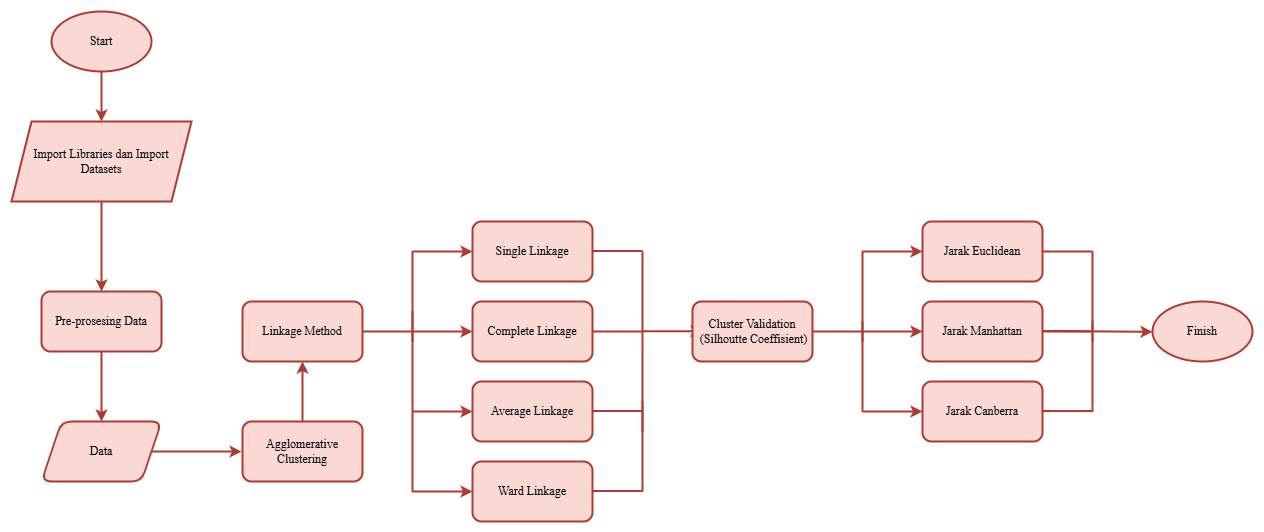

# Import Libraries

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [266]:
import os

from google.colab import drive
drive.mount('/content/gdrive')
customer = pd.read_csv("/content/gdrive/My Drive/Analisis Multivariat/tugas clustering.csv")
customer.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Annual_Premium        1000 non-null   int64
 2   Policy_Sales_Channel  1000 non-null   int64
 3   Vintage               1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


#Pre-processing Data

In [267]:
# cuplikan data customer
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
0,22,36513,160,189
1,24,2630,160,268
2,22,35832,152,289
3,72,36685,26,113
4,66,2630,45,123


##Data Cleaning

In [268]:
# checck missing value
customer.isna().sum()

,0
Age,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


Tidak ada missing value

In [269]:
# check duplicated id
customer.duplicated(subset="Policy_Sales_Channel").sum()

np.int64(950)

Tidak ada duplicated

In [270]:
# drop kolom Policy_Sales_Channel karena tidak bermakna
customer = customer.drop(columns="Policy_Sales_Channel")

In [271]:
# deskripsi statistik
customer.describe()

,Age,Annual_Premium,Vintage
count,1000.000000,1000.000000,1000.000000
mean,39.653000,30364.102000,154.565000
std,15.776929,16348.152121,83.320815
min,20.000000,2630.000000,10.000000
25%,25.000000,24415.250000,88.000000
50%,38.000000,31511.500000,154.000000
75%,50.250000,39555.750000,227.000000
max,85.000000,100278.000000,299.000000


Terdapat perbedaan skala: wajib feature scaling

##Feature Scaling

In [272]:
# minmax scaler sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_scaled = scaler.fit_transform(customer)

pd.DataFrame(customer_scaled).describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.302354,0.284021,0.500225
std,0.242722,0.167419,0.288307
min,0.000000,0.000000,0.000000
25%,0.076923,0.223100,0.269896
50%,0.276923,0.295772,0.498270
75%,0.465385,0.378152,0.750865
max,1.000000,1.000000,1.000000


Menyelaraskan skala data ke rentang [0, 1]

##Visualisasi

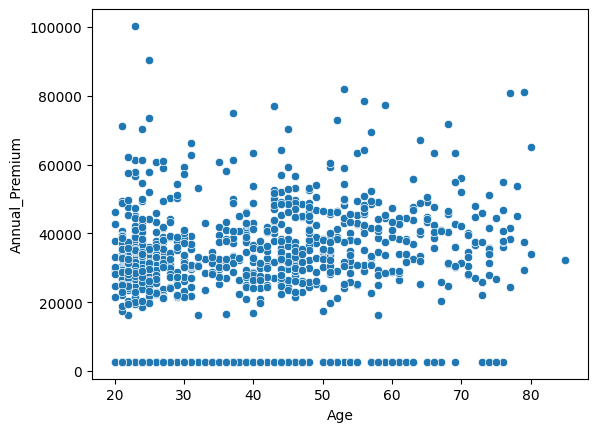

In [273]:
# draw age and annual premium columns as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium")
plt.show()

Scatter plot untuk melihat hubungan antar variabel Age dan Annual Premium

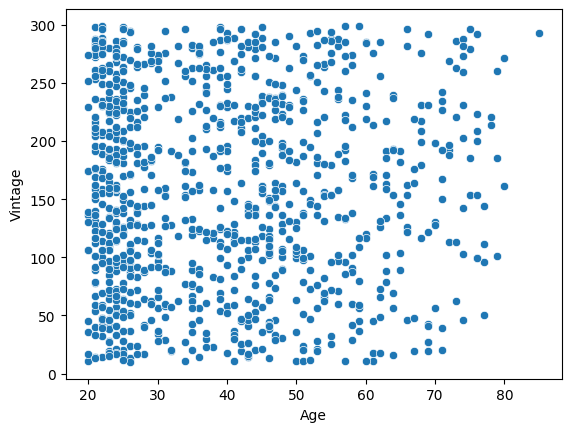

In [274]:
# draw age and vintage columns as scatter plot
sns.scatterplot(data=customer, x="Age",y="Vintage")
plt.show()

Scatter plot untuk melihat hubungan antara variabel Age dan Vintage

# Agglomerative Clustering

#Linkage Method

##Single Linkage

In [275]:
# train agglomerative clustering with 5 clusters, linkage="single"
from sklearn.cluster import AgglomerativeClustering
agg_clus_single = AgglomerativeClustering(n_clusters=5,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single', n_clusters=5)

Hierarchical clustering dilakukan dengan metode single linkage (berdasarkan jarak terdekat antar titik) dan dibentuk menjadi 5 cluster.

In [276]:
# assign clusters to customer dataframe
customer["label_single"] = agg_clus_single.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single
0,22,36513,189,0
1,24,2630,268,0
2,22,35832,289,0
3,72,36685,113,0
4,66,2630,123,0


Label hasil clustering metode single linkage disimpan pada kolom label_single.

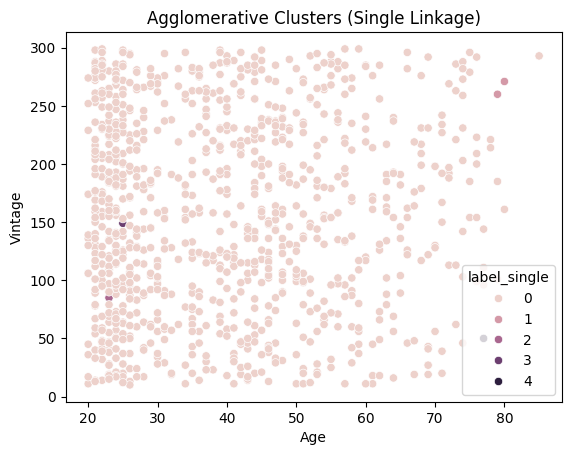

In [277]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Vintage",hue="label_single")
plt.title("Agglomerative Clusters (Single Linkage)")
plt.show()

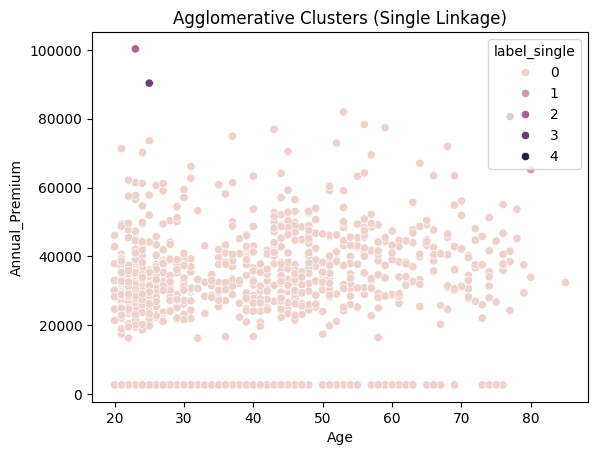

In [278]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_single")
plt.title("Agglomerative Clusters (Single Linkage)")
plt.show()

Nyaris semua customers dikelompokkan menjadi cluster 0

##Complete Linkage

In [279]:
# train agglomerative clustering with 5 clusters, linkage="complete"
from sklearn.cluster import AgglomerativeClustering
agg_clus_complete = AgglomerativeClustering(n_clusters=5,linkage="complete")
agg_clus_complete.fit(customer_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

Hierarchical clustering dilakukan dengan metode complete linkage (berdasarkan jarak terjauh antar titik) dan dibentuk menjadi 5 cluster.

In [280]:
# assign clusters to customer dataframe
customer["label_complete"] = agg_clus_complete.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_complete
0,22,36513,189,0,4
1,24,2630,268,0,0
2,22,35832,289,0,0
3,72,36685,113,0,2
4,66,2630,123,0,2


Label hasil clustering metode complete linkage disimpan pada kolom label_complete.

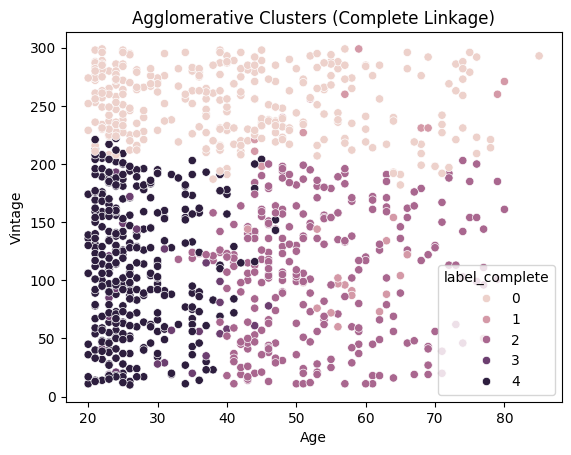

In [281]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Vintage",hue="label_complete")
plt.title("Agglomerative Clusters (Complete Linkage)")
plt.show()

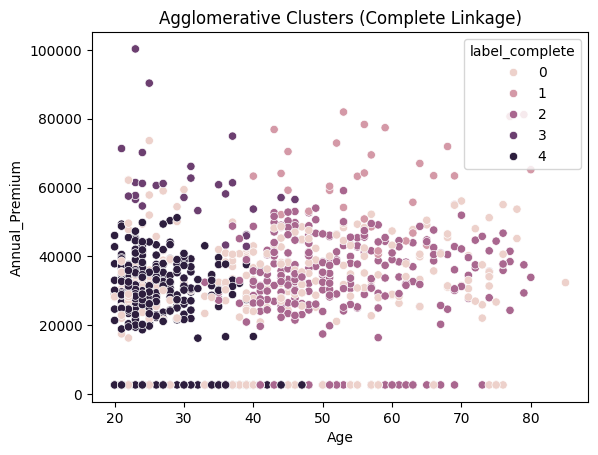

In [282]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_complete")
plt.title("Agglomerative Clusters (Complete Linkage)")
plt.show()

scatter plot menunjukkan pengelompokan setiap cluster cukup baik akan tetapi masih kurang jelas bentuk antara setiap cluster

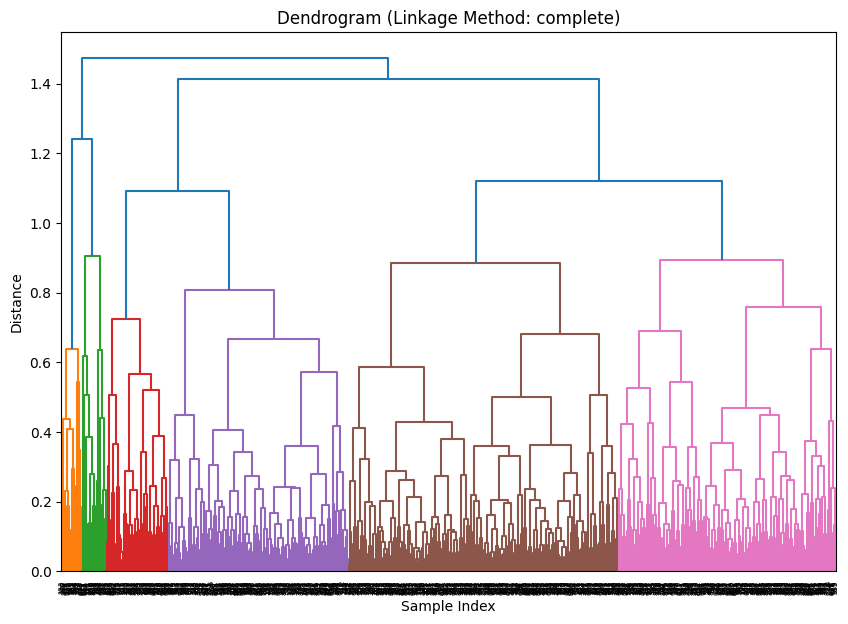

In [283]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

##Average Linkage

In [284]:
# train agglomerative clustering with 5 clusters, linkage="average"
from sklearn.cluster import AgglomerativeClustering
agg_clus_average = AgglomerativeClustering(n_clusters=5,linkage="average")
agg_clus_average.fit(customer_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

Hierarchical Clustering dilakukan menggunakan metode linkage average, yang menghitung rata-rata jarak dari seluruh pasangan titik antar cluster, dan dibentuk menjadi 5 cluster

In [285]:
# assign clusters to customer dataframe
customer["label_average"] = agg_clus_average.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_complete,label_average
0,22,36513,189,0,4,2
1,24,2630,268,0,0,2
2,22,35832,289,0,0,2
3,72,36685,113,0,2,0
4,66,2630,123,0,2,0


Label hasil cluster disimpan dalam kolom label_average

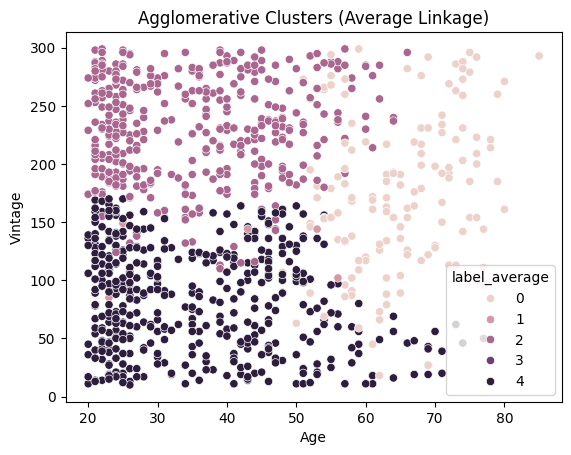

In [286]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Vintage",hue="label_average")
plt.title("Agglomerative Clusters (Average Linkage)")
plt.show()

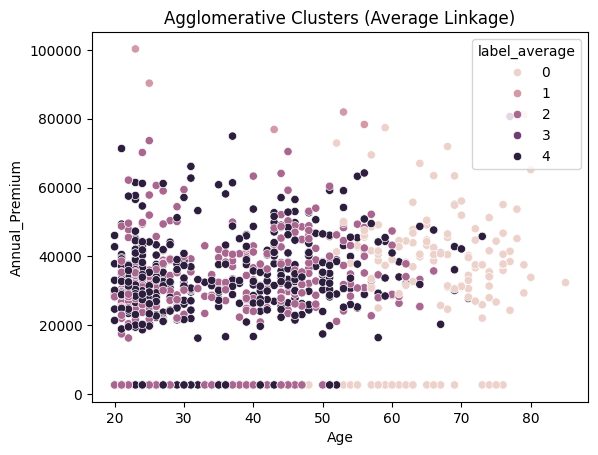

In [287]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_average")
plt.title("Agglomerative Clusters (Average Linkage)")
plt.show()

Scatter plot menampilkan pengelompokan setiap cluster terlihat lebih baik dan tidak berantakan pada setiap cluster

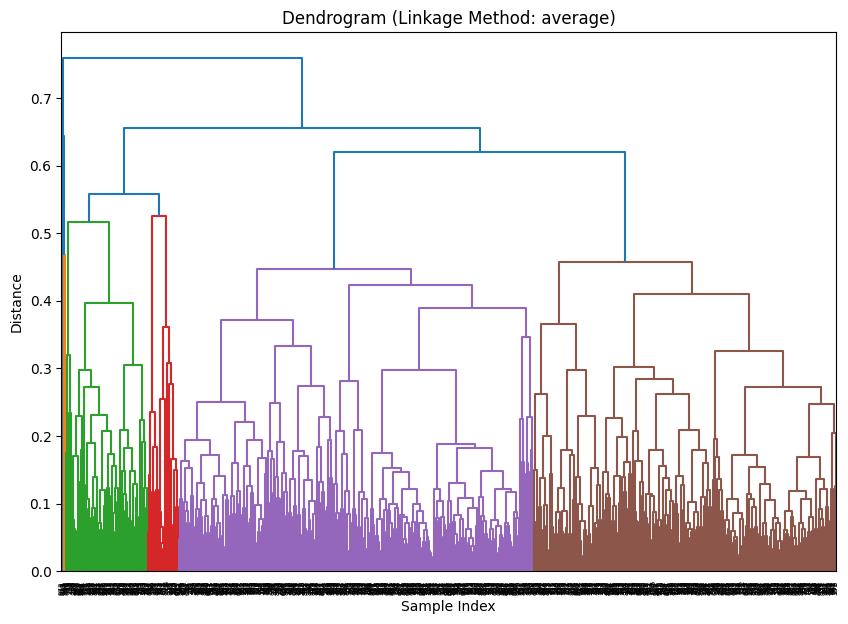

In [288]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

##Ward Linkage

In [289]:
# train agglomerative clustering with 5 clusters, linkage="ward"
from sklearn.cluster import AgglomerativeClustering
agg_clus_ward = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering(n_clusters=5)

Hierarchical clustering dilakukan dengan metode ward linkage, yaitu menggabungkan cluster dengan varian terkecil, dan membentuk 5 cluster.

In [290]:
# assign clusters to customer dataframe
customer["label_ward"] = agg_clus_ward.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_complete,label_average,label_ward
0,22,36513,189,0,4,2,4
1,24,2630,268,0,0,2,1
2,22,35832,289,0,0,2,4
3,72,36685,113,0,2,0,3
4,66,2630,123,0,2,0,0


Label hasil clustering metode ward linkage disimpan pada kolom label_ward.

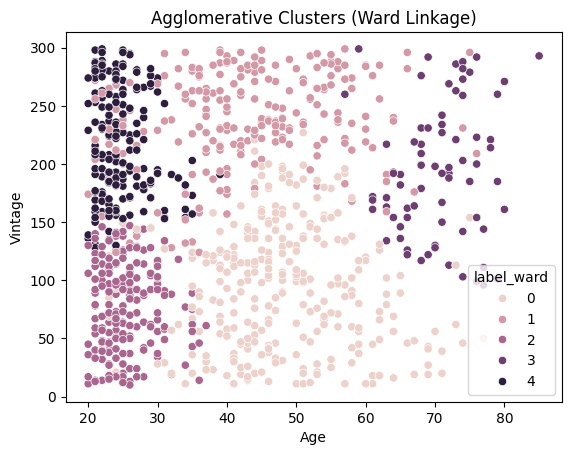

In [291]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Vintage",hue="label_ward")
plt.title("Agglomerative Clusters (Ward Linkage)")
plt.show()

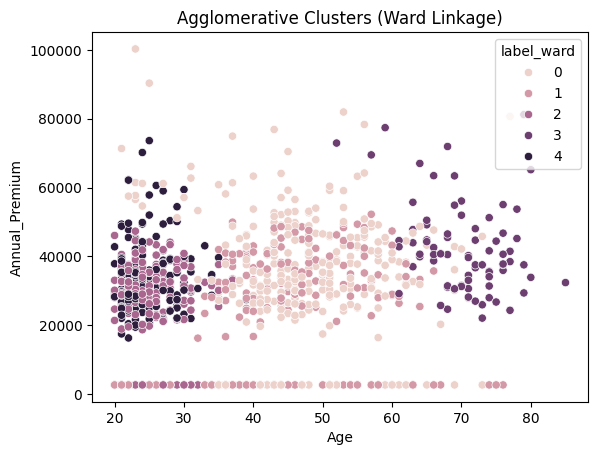

In [292]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_ward")
plt.title("Agglomerative Clusters (Ward Linkage)")
plt.show()

Hasil visualisasi menunjukkan bahwa pengelompokan setiap cluster tidak beraturan

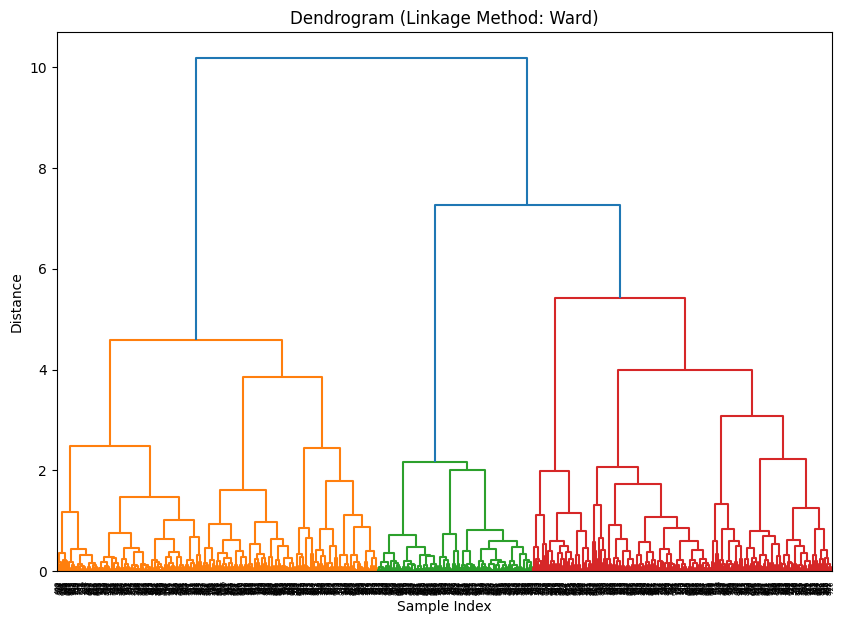

In [293]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Visualisasi dendrogram digunakan untuk menunjukkan struktur hierarki proses penggabungan cluster.

#Cluster Validation

kriteria cluster diukur berdasarkan nilai koefisien Silhoutte pada tabel di bawah ini

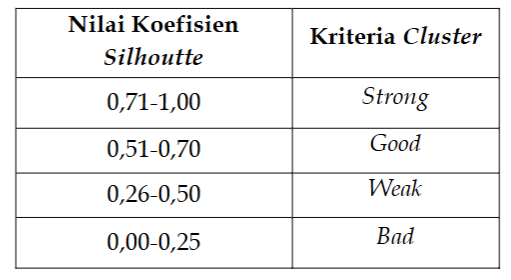

Cluster validation dilakukan
untuk menentukan cluster optimal dengan
melakukan perbandingan nilai validasi untuk memperoleh cluster terbaik.

In [294]:
# Import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# --- 1. Load dataset ---
# Use the correct path to the file in Google Drive
data = pd.read_csv("/content/gdrive/My Drive/Analisis Multivariat/tugas clustering.csv")

# --- 2. Normalisasi data (agar jarak bisa dibandingkan adil) ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# --- 3. Definisikan parameter clustering ---
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cityblock', 'canberra']  # Corrected 'Manhattan' to 'cityblock'

# --- 4. Simpan hasil silhouette ---
results = []

# --- 5. Lakukan clustering untuk setiap kombinasi metode dan jarak ---
for method in linkage_methods:
    for metric in distance_metrics:
        # Ward only supports Euclidean
        if method == 'ward' and metric != 'euclidean':
            sil = np.nan
        else:
            # Calculate linkage matrix
            Z = linkage(data_scaled, method=method, metric=metric)

            # Determine the number of clusters (e.g., k=3, you can adjust this)
            labels = fcluster(Z, 3, criterion='maxclust')

            # Calculate silhouette score
            sil = silhouette_score(data_scaled, labels, metric=metric)

        results.append([method.title() + ' Linkage', metric.title(), sil])

# --- 6. Convert to DataFrame and pivot for a table like the image ---
df_results = pd.DataFrame(results, columns=['Metode', 'Jarak', 'Silhouette Coefficient'])
table = df_results.pivot(index='Metode', columns='Jarak', values='Silhouette Coefficient')

# --- 7. Display the results table ---
print("Tabel Silhouette Coefficient:")
display(table.round(2))

Tabel Silhouette Coefficient:


Jarak,Canberra,Cityblock,Euclidean
Metode,,,
Average Linkage,0.31,0.30,0.28
Complete Linkage,0.19,0.17,0.25
Single Linkage,0.01,0.26,0.28
Ward Linkage,NaN,NaN,0.29


Struktur klaster paling stabil dan terpisah dengan baik diperoleh menggunakan metode Average Linkage dan metrik jarak Canberra.
Metode Ward Linkage juga cukup baik jika menggunakan jarak Euclidean. Metode lain cenderung menghasilkan klaster yang kurang kompak atau terlalu menyebar.

# Selesai